# Objective

Plot and compare residuals of SS per iteration, of ANN and EOS at a specitic P-T-z in 2-phase region. 

1) Store ANN phase split SS residuals and iteration   
2) Store EOS phase split SS residuals and iteration  
3) Plot and compare  

Expect ANN SS residuals to bounce at around 1E-6, due to model precision limit.  
Expect EOS SS residuals to converge to zero.  

Details:  
Modify Applied_model/nC4-nC10_evaluation/Stability_and_flash.py, make script return SS residual to jupyter notebook.  
ln_phi_diff = ln_phi_x - ln_phi_y  
c = np.abs(ln_phi_diff - np.log(K))  

In [1]:
from Stability_and_flash import pr as PR
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Instantiate class
pr = PR()
pr.useModel = True


In [3]:
# Set up variables to collect SS residuals
pr.return_SS_residuals = True
pr.SS_c = []
pr.SS_it = []

In [4]:
########################################################################################
# INPUTS
T = 500  # [K] [620, 650]
P = 49#30  # [bar] [10, 30]

# nC4-C10
z = np.array([0.8,0.2])#np.array([0.65, 0.35])
w = np.array([0.193, 0.49])
Pc = np.array([37.997, 21.1])  # [bar]
Tc = np.array([425.2, 617.6])  # [K]
BIP = np.zeros([2, 2])

NRtol = 1E-12
NRmaxit = 100  # I think 10 is enough
SStol = 1E-10 #1E-6  #1E-10
tolSSSA = 1E-5
SSmaxit = 500 #500  # 1000000 # 1E6 might crash my computer or take too long. Set to 100 to show plot
TolRR = 1E-10
TolXz = 1E-8
itSSSAmax = 1E6

# More global constants
Tr = T / Tc
Pr = P / Pc

Nc = len(z)

phase_num = 1
row_index = 0

In [5]:
#####################################################################################

# Load models
modelPath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T300-600_P5-100__100_4_20_100_20200915-230243'
]
pipelinePath = [
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC4_T300-600_P5-100__100_4_20_100_20200916-112226\full_pipeline_lnphi_nC4_T300-600_P5-100__100_4_20_100_.pkl',
    r'C:\Users\win7\Desktop\logs\logs\scalars\lnphi_nC10_T300-600_P5-100__100_4_20_100_20200915-230243\full_pipeline_lnphi_nC4_T300-600_P5-100__100_4_20_100_.pkl'
]
pr.load_ANN_model(modelPath, pipelinePath)


Model loading successful.


In [6]:

# Parameters independent of composition placed out of loop.
# Used in either stability analysis or 2-phase PT flash.

# Get all K-values from Wilson
K = pr.wilson_corr(Pr, Tr, w)
ln_K = np.log(K)

# Get all ai, bi values
a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

# Get Vw mixing, part with BIPs and square roots
Am = pr.Vw(Nc,a_i,BIP)
##########################################################################################
# Debug
pr.tmp_list = []
pr.z_list = []
# Stability Analysis
# Calculate constants ln_phi(z) ln(z[i])

sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

print('At P = %s bar, and T = %s K' % (P, T))
if liq_case < 0 or vap_case < 0:
    print('Run 2-phase flash.')
    phase_num = 2
    liq_comp, vap_comp = pr.two_phase_flash_iterate(Pr, Tr, w, SSmaxit, SStol, TolRR, Nc, Am, b_i, NRmaxit, z) #todo: Update Stability_and_flash
    print('liq and vap comp:')
    print(liq_comp, vap_comp)
elif liq_case > 0 and vap_case > 0:
    print('Single phase stable')
    print('P = %s bar, T = %s K' % (P, T))
    print('Liq case: %d, Vap case: %d' % (liq_case, vap_case))
    # Copy single phase composition
        
print('END')


At P = 49 bar, and T = 500 K
Run 2-phase flash.
[2.02199743 0.06558207]
SS Flash outer loop count: 0
Vapor frac: 0.6604527413720344
Liquid comp: [0.47761736 0.52238264]
Vapor comp: [0.96574107 0.03425893]
K old: [2.02199743 0.06558207]
K new: [1.338785   0.32163042]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.5889533516799665
Liquid comp: [0.66692867 0.33307133]
Vapor comp: [0.89287413 0.10712587]
K old: [1.338785   0.32163042]
K new: [1.2175616  0.45185733]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.5401941349072863
Liquid comp: [0.71586734 0.28413266]
Vapor comp: [0.87161257 0.12838743]
K old: [1.2175616  0.45185733]
K new: [1.1692365 0.526467 ]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.5076503825709524
Liquid comp: [0.73670727 0.26329273]
Vapor comp: [0.86138506 0.13861494]
K old: [1.1692365 0.526467 ]
K new: [1.139615  0.5751662]
###############################

K old: [1.0077525  0.95267636]
K new: [1.0050867 0.9696991]
########################################
SS Flash outer loop count: 36
Vapor frac: -12.91668389651743
Liquid comp: [0.85625858 0.14374142]
Vapor comp: [0.86061407 0.13938593]
K old: [1.0050867 0.9696991]
K new: [1.0033332  0.97490996]
########################################
SS Flash outer loop count: 37
Vapor frac: -28.11703894312592
Liquid comp: [0.88272942 0.11727058]
Vapor comp: [0.88567174 0.11432826]
K old: [1.0033332  0.97490996]
K new: [1.0013589 0.9880256]
########################################
SS Flash outer loop count: 38
Vapor frac: -80.37224538999806
Liquid comp: [0.89808444 0.10191556]
Vapor comp: [0.89930482 0.10069518]
K old: [1.0013589 0.9880256]
K new: [1.0005572 0.995132 ]
########################################
SS Flash outer loop count: 39
Vapor frac: -194.60820464942753
Liquid comp: [0.89729617 0.10270383]
Vapor comp: [0.89779613 0.10220387]
K old: [1.0005572 0.995132 ]
K new: [1.0002283  0.99800307]
#

C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  xl = 1 / (1 - Kmax)
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:88: RuntimeWarning: divide by zero encountered in true_divide
  y = np.sum(((K - 1) * z) / (1 + (K - 1) * xg))
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:89: RuntimeWarning: divide by zero encountered in true_divide
  fp = np.sum(-1 * (z * (K - 1) ** 2) / (1 + xg * (K - 1)) ** 2) # This is the gradient at xg
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:90: RuntimeWarning: invalid value encountered in double_scalars
  xn = xg - y / fp
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.

K old: [1.        0.9999982]
K new: [nan nan]
########################################
SS Flash outer loop count: 48
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 49
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 50
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 51
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 52
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 53
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 54
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 55
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 56
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 57
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 58
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 59
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 60
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 61
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 62
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 63
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 64
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 65
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 66
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 67
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 68
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 69
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 70
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 71
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 72
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 73
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 74
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 75
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 76
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 77
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 78
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 79
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 80
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 81
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 82
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 83
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 84
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 85
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 86
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 87
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 88
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 89
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 90
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 91
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 92
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 93
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 94
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 95
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 96
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 97
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 98
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 99
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 100
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 101
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 102
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 103
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 104
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 105
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 106
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 107
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 108
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 109
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 110
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 111
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 112
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 113
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 114
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 115
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 116
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 117
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 118
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 119
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 120
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 121
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 122
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 123
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 124
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 125
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 126
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 127
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 128
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 129
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 130
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 131
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 132
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 133
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 134
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 135
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 136
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 137
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 138
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 139
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 140
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 141
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 142
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 143
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 144
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 145
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 146
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 147
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 148
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 149
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 150
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 151
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 152
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 153
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 154
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 155
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 156
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 157
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 158
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 159
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 160
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 161
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 162
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 163
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 164
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 165
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 166
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 167
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 168
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 169
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 170
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 171
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 172
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 173
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 174
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 175
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 176
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 177
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 178
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 179
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 180
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 181
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 182
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 183
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 184
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 185
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 186
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 187
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 188
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 189
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 190
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 191
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 192
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 193
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 194
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 195
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 196
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 197
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 198
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 199
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 200
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 201
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 202
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 203
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 204
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 205
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 206
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 207
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 208
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 209
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 210
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 211
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 212
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 213
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 214
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 215
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 216
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 217
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 218
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 219
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 220
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 221
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 222
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 223
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 224
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 225
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 226
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 227
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 228
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 229
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 230
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 231
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 232
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 233
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 234
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 235
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 236
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 237
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 238
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 239
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 240
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 241
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 242
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 243
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 244
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 245
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 246
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 247
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 248
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 249
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 250
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 251
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 252
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 253
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 254
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 255
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 256
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 257
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 258
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 259
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 260
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 261
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 262
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 263
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 264
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 265
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 266
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 267
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 268
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 269
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 270
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 271
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 272
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 273
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 274
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 275
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 276
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 277
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 278
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 279
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 280
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 281
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 282
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 283
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 284
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 285
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 286
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 287
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 288
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 289
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 290
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 291
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 292
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 293
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 294
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 295
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 296
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 297
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 298
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 299
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 300
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 301
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 302
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 303
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 304
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 305
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 306
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 307
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 308
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 309
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 310
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 311
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 312
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 313
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 314
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 315
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 316
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 317
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 318
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 319
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 320
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 321
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 322
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 323
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 324
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 325
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 326
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 327
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 328
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 329
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 330
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 331
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 332
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 333
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 334
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 335
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 336
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 337
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 338
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 339
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 340
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 341
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 342
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 343
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 344
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 345
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 346
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 347
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 348
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 349
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 350
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 351
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 352
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 353
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 354
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 355
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 356
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 357
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 358
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 359
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 360
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 361
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 362
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 363
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 364
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 365
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 366
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 367
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 368
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 369
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 370
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 371
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 372
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 373
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 374
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 375
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 376
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 377
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 378
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 379
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 380
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 381
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 382
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 383
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 384
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 385
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 386
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 387
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 388
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 389
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 390
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 391
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 392
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 393
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 394
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 395
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 396
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 397
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 398
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 399
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 400
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 401
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 402
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 403
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 404
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 405
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 406
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 407
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 408
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 409
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 410
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 411
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 412
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 413
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 414
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 415
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 416
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 417
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 418
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 419
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 420
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 421
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 422
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 423
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 424
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 425
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 426
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 427
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 428
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 429
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 430
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 431
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 432
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 433
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 434
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 435
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 436
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 437
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 438
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 439
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 440
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 441
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 442
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 443
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 444
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 445
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 446
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 447
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 448
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 449
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 450
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 451
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 452
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 453
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 454
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 455
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 456
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 457
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 458
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 459
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 460
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 461
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 462
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 463
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 464
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 465
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 466
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 467
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 468
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 469
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 470
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 471
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 472
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 473
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 474
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 475
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 476
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 477
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 478
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 479
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 480
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 481
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 482
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 483
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 484
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 485
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 486
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 487
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 488
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 489
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 490
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 491
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 492
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 493
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 494
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 495
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 496
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 497
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:
C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 498
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
SS Flash outer loop count: 499
Vapor frac: nan
Liquid comp: [nan nan]
Vapor comp: [nan nan]
K old: [nan nan]
K new: [nan nan]
########################################
END 2-phase flash
liq and vap comp:
[nan nan] [nan nan]
END


C:\Users\win7\PycharmProjects\Ln_phi_model\Applied_model\nC4-nC10_evaluation\Stability_and_flash.py:362: RuntimeWarning: invalid value encountered in less
  if np.max(c) < SStol:


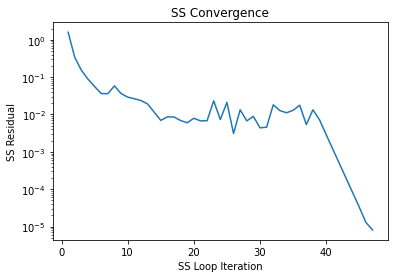

In [7]:
ANN_SS_c = np.array(pr.SS_c)
ANN_SS_it = np.array(pr.SS_it)

fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(ANN_SS_it, ANN_SS_c)
ax.set_title('SS Convergence')
ax.set_xlabel('SS Loop Iteration')
ax.set_ylabel('SS Residual')
ax.set_yscale('log')

## EOS

In [8]:
pr.useModel = False

In [9]:
# Set up variables to collect SS residuals
pr.return_SS_residuals = True
pr.SS_c = []
pr.SS_it = []

In [10]:

# Parameters independent of composition placed out of loop.
# Used in either stability analysis or 2-phase PT flash.

# Get all K-values from Wilson
K = pr.wilson_corr(Pr, Tr, w)
ln_K = np.log(K)

# Get all ai, bi values
a_i, b_i = pr.aibi(P, T, w, Pr, Tr, Pc, Tc)

# Get Vw mixing, part with BIPs and square roots
Am = pr.Vw(Nc,a_i,BIP)
##########################################################################################
# Debug
pr.tmp_list = []
pr.z_list = []
# Stability Analysis
# Calculate constants ln_phi(z) ln(z[i])

sumXX_list, liq_case, vap_case = pr.stability_analysis(T, P, z, b_i, Am, tolSSSA, itSSSAmax, Nc, K, TolXz)

print('At P = %s bar, and T = %s K' % (P, T))
if liq_case < 0 or vap_case < 0:
    print('Run 2-phase flash.')
    phase_num = 2
    liq_comp, vap_comp = pr.two_phase_flash_iterate(Pr, Tr, w, SSmaxit, SStol, TolRR, Nc, Am, b_i, NRmaxit, z) #todo: Update Stability_and_flash
    print('liq and vap comp:')
    print(liq_comp, vap_comp)
elif liq_case > 0 and vap_case > 0:
    print('Single phase stable')
    print('P = %s bar, T = %s K' % (P, T))
    print('Liq case: %d, Vap case: %d' % (liq_case, vap_case))
    # Copy single phase composition
        
print('END')


At P = 49 bar, and T = 500 K
Run 2-phase flash.
[2.02199743 0.06558207]
SS Flash outer loop count: 0
Vapor frac: 0.6604527413720344
Liquid comp: [0.47761736 0.52238264]
Vapor comp: [0.96574107 0.03425893]
K old: [2.02199743 0.06558207]
K new: [1.3440377  0.31993111]
########################################
SS Flash outer loop count: 1
Vapor frac: 0.5950197779628529
Liquid comp: [0.66406065 0.33593935]
Vapor comp: [0.89252255 0.10747745]
K old: [1.3440377  0.31993111]
K new: [1.22358872 0.44890125]
########################################
SS Flash outer loop count: 2
Vapor frac: 0.5571459580516556
Liquid comp: [0.71138204 0.28861796]
Vapor comp: [0.87043904 0.12956096]
K old: [1.22358872 0.44890125]
K new: [1.17298593 0.52528836]
########################################
SS Flash outer loop count: 3
Vapor frac: 0.5290702002658448
Liquid comp: [0.73292175 0.26707825]
Vapor comp: [0.85970691 0.14029309]
K old: [1.17298593 0.52528836]
K new: [1.14486036 0.57610743]
#########################

K new: [1.04541269 0.82842955]
########################################
SS Flash outer loop count: 82
Vapor frac: 0.25875199486631684
Liquid comp: [0.79070868 0.20929132]
Vapor comp: [0.82661689 0.17338311]
K old: [1.04541269 0.82842955]
K new: [1.04536723 0.82857909]
########################################
SS Flash outer loop count: 83
Vapor frac: 0.2584071136709531
Liquid comp: [0.7907301 0.2092699]
Vapor comp: [0.82660334 0.17339666]
K old: [1.04536723 0.82857909]
K new: [1.04532356 0.82872279]
########################################
SS Flash outer loop count: 84
Vapor frac: 0.2580748825382657
Liquid comp: [0.79075069 0.20924931]
Vapor comp: [0.82659033 0.17340967]
K old: [1.04532356 0.82872279]
K new: [1.0452816  0.82886088]
########################################
SS Flash outer loop count: 85
Vapor frac: 0.25775482431691027
Liquid comp: [0.79077048 0.20922952]
Vapor comp: [0.82657784 0.17342216]
K old: [1.0452816  0.82886088]
K new: [1.04524128 0.82899361]
#####################

Liquid comp: [0.79127952 0.20872048]
Vapor comp: [0.82626691 0.17373309]
K old: [1.04421622 0.83237204]
K new: [1.04421609 0.83237245]
########################################
SS Flash outer loop count: 240
Vapor frac: 0.2492452794455686
Liquid comp: [0.79127958 0.20872042]
Vapor comp: [0.82626688 0.17373312]
K old: [1.04421609 0.83237245]
K new: [1.04421597 0.83237284]
########################################
SS Flash outer loop count: 241
Vapor frac: 0.24924419932960712
Liquid comp: [0.79127964 0.20872036]
Vapor comp: [0.82626684 0.17373316]
K old: [1.04421597 0.83237284]
K new: [1.04421586 0.83237322]
########################################
SS Flash outer loop count: 242
Vapor frac: 0.2492431577685449
Liquid comp: [0.7912797 0.2087203]
Vapor comp: [0.82626681 0.17373319]
K old: [1.04421586 0.83237322]
K new: [1.04421575 0.83237358]
########################################
SS Flash outer loop count: 243
Vapor frac: 0.24924215338648367
Liquid comp: [0.79127976 0.20872024]
Vapor comp:

K new: [1.04421283 0.83238313]
########################################
SS Flash outer loop count: 391
Vapor frac: 0.249215152780825
Liquid comp: [0.79128126 0.20871874]
Vapor comp: [0.82626604 0.17373396]
K old: [1.04421283 0.83238313]
K new: [1.04421283 0.83238313]
########################################
SS Flash outer loop count: 392
Vapor frac: 0.24921514833538344
Liquid comp: [0.79128126 0.20871874]
Vapor comp: [0.82626604 0.17373396]
K old: [1.04421283 0.83238313]
K new: [1.04421283 0.83238313]
########################################
SS Flash outer loop count: 393
Vapor frac: 0.24921514404877382
Liquid comp: [0.79128126 0.20871874]
Vapor comp: [0.82626604 0.17373396]
K old: [1.04421283 0.83238313]
K new: [1.04421283 0.83238314]
########################################
SS Flash outer loop count: 394
Vapor frac: 0.24921513991559077
Liquid comp: [0.79128126 0.20871874]
Vapor comp: [0.82626604 0.17373396]
K old: [1.04421283 0.83238314]
K new: [1.04421282 0.83238314]
###############

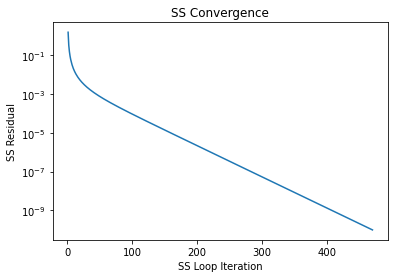

In [11]:
EOS_SS_c = np.array(pr.SS_c)
EOS_SS_it = np.array(pr.SS_it)

fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(EOS_SS_it, EOS_SS_c)
ax.set_title('SS Convergence')
ax.set_xlabel('SS Loop Iteration')
ax.set_ylabel('SS Residual')
ax.set_yscale('log')

EOS vs ANN comparison plot

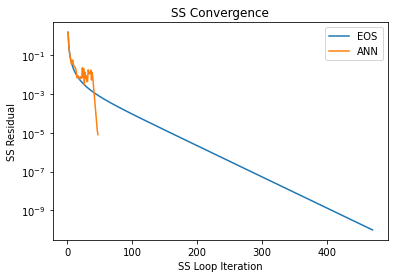

In [12]:
fig = plt.figure('''figsize=(20,20)''')
ax = fig.add_subplot(111)
ax.plot(EOS_SS_it, EOS_SS_c, label='EOS')
ax.plot(ANN_SS_it, ANN_SS_c, label='ANN')
ax.set_title('SS Convergence')
ax.set_xlabel('SS Loop Iteration')
ax.set_ylabel('SS Residual')
ax.set_yscale('log')
ax.legend()

ANN SS residual appears to fall to zero, momentarily, because of precision error. Predicted $ln\phi_i$ has a maximum of about 7 decimals of precision.